# MURCHIE85 TWITTER PROCESSING (TOPIC = #BREXIT)

  
    

![image](https://static.independent.co.uk/s3fs-public/thumbnails/image/2019/03/29/17/brexit-parliament-protests-3.jpg)


This repo is for pulling metrics on a given keyword (best use keywords that are hashtagged) and performs a series of reporting and analysis.



## AUTOMATED RESEARCH SUMMARY


The majority of tweeters on this topic describe themselves in their Bio with **' '** , **' '** and **'# '**
The top most popular words tweeted are :

- ** **
- **# **
- **# **
- ** **
- ** **
- **# **
- **abortion**
- ** **
- ** **
- **# **


VIEWS WERE MOSTLY : ** **  (%) & ** ** (%)
 


## OVERVIEW

**SKIP TO BOTTOM FOR FULL RESULTS & GRAPH BREAKDOWN **

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)

## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 
3. This is data provided by the Twitter API which accesses their database, the maintenence of DB and thus data quality is managed by Twitter

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://s3.amazonaws.com/re-work-production/avatars/1104/original.png?1485507466)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [1]:
import datetime


f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 

If you want to change the parameters, edit the following line:  

```
stream.filter(track=["SexStrike"],languages=["en"])
```

*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [3]:
from ipywidgets import IntProgress
from IPython.display import display
import time

import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []


max_count = 1000

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar



class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=max_count # max number of tweets
        self.tweet_number+=1   
        f.value += 1 # signal to increment the progress bar
        time.sleep(.1)
        status_array.append(status._json)

        if self.tweet_number>=self.max_tweets:
            sys.exit('PROCESSING COMPLETE : '+str(self.max_tweets)+' tweets processed.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

print('Pulling down data.....')
stream.filter(track=["Brexit"],languages=["en"])



Pulling down data.....


SystemExit: PROCESSING COMPLETE : 1000 tweets processed.

/Users/adammcmurchie/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# PRINT AND SAVE DATA

This section allows me to pull the recently mined data into a file in raw format incase i need it later.

In [4]:
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()

data/streamout-2019-05-16 22:27:54.517845.txt


# STREAM METADATA

In [5]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
print('An example element looks like: ')

Number of records
1000

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])

An example element looks like: 


# REPORT GENERATION

In [6]:
# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
print('=========================SAMPLE OUTPUT================================')
print('************************************************************')
print(status_array[0]['text'])
print('------------------------------')
print(status_array[0]['created_at'])
print('------------------------------')
print(status_array[0]['user']['name'])
print('------------------------------')
print(status_array[0]['user']['location'])
print('------------------------------')
print(status_array[0]['user']['description'])
print('--------------REPLY COUNT----------------')
print(status_array[0]['reply_count'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------RETWEETED?----------------') 
print(status_array[0]['retweeted'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------FAVOURITED----------------')
print(status_array[0]['favorited'])
print('--------------FAVOURITE COUNT----------------')
print(status_array[0]['favorite_count'])



=========================SAMPLE OUTPUT================================
************************************************************
RT @trevorw1953: I have read extensively on the history of Germany, between 1900 and 1945, and it scares the hell out of me!
https://t.co/D…
------------------------------
Thu May 16 21:21:39 +0000 2019
------------------------------
DAVID MOLE
------------------------------
GREAT BRITAIN UNITED KINGDOM
------------------------------
LIFE SUCCESS COACHING TRAINER HELPING NEW COMERS ACHIEVE PROSPERITY VIA PROVEN SYSTEMS  + EXCELLENT TEAM BUILDING SKILLS  SEMINARS  :- SKYPE perpetual-wealth
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


## USER DESCRIPTION NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency 

```
WORDONE='#MAGA'
WORDTWO='me'
WORDTHREE='life'
```

In [21]:

WORDONE='Brexit'
WORDTWO='UK'
WORDTHREE='life'

WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 

linecount = 0
APPENDED_DESCRIPTION = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = status_array[x]['user']['description']
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    
    
    if str(description).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1

    if str(description).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1

    if str(description).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total Number of Records: ' + str(linecount))    

Total count of words - Brexit  :71
Total count of words - UK :46
Total count of words - life :31
Total Number of Records: 1000


In [19]:
from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x['⠀'],x['what'],x['.'],x['was'],x['THE'],x['now'],x['more'],x['if'],x['their'],x['or'],x['love'],x['Love'],x['things'],x["don't"], x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x['We'],x['we'],x["not"], x["but"], x["be"],x['can'], x["The"],x['out'], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'],x["I'm"],x["I’m"], x['A'],x['our'],x['/'],x['-'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having'],x['all'],x['at'],x['good'],x['do'],x['love'],x['as'],x['My'],x['i'],x['always'],x['me'],x['get'],x['will'],x['so'],x['can',x['⠀']]


      
            
top_desc = OrderedDict(x.most_common(20))
print(top_desc)


OrderedDict([('Brexit', 34), ('UK', 21), ('#FBPE', 18), ('up', 17), ('European', 17), ('EU', 17), ('Proud', 17), ('Labour', 17), ('own', 16), ('people', 15), ('hate', 15), ('necessarily', 15), ('over', 14), ('Tory', 14), ('live', 14), ('work', 13), ('Brexit.', 12), ('Party', 11), ('#Brexit', 11), ('views', 11)])


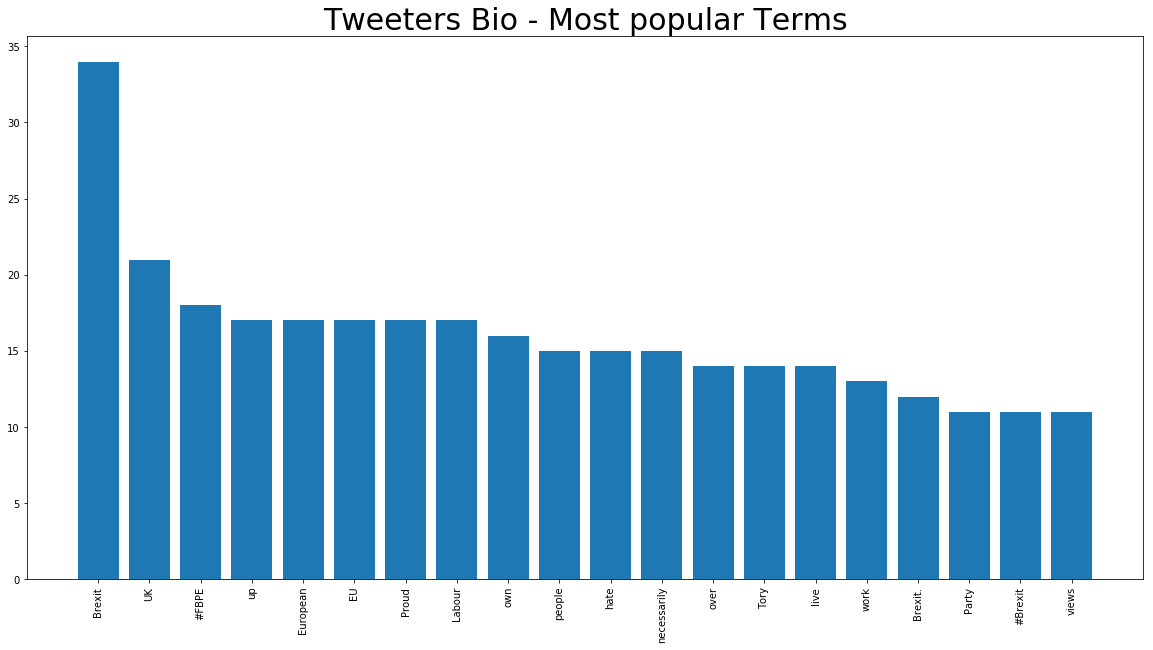

In [20]:
import matplotlib.pyplot as plt

D = top_desc

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.title("Tweeters Bio - Most popular Terms", fontsize=30)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## TWEET NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency 

```
WORDONE='Alabama'
WORDTWO='abortion'
WORDTHREE='life'
```

In [23]:
WORDONE='Brexit'
WORDTWO='UK'
WORDTHREE='Labour'

WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
linecount = 0
APPENDED_TEXT = ""


for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = status_array[x]['text']
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1

    if str(text).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1

    if str(text).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total Number of Records: ' + str(linecount))


Total count of words - Brexit :507
Total count of words - UK :75
Total count of words - Labour :73
Total Number of Records: 1000


In [25]:
len(APPENDED_TEXT)

129618

In [26]:
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x['⠀'],x['what'],x['.'],x['was'],x['THE'],x['now'],x['more'],x['if'],x['their'],x['or'],x['love'],x['Love'],x['things'],x["don't"], x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x['We'],x['we'],x["not"], x["but"], x["be"],x['can'], x["The"],x['out'], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'],x["I'm"],x["I’m"], x['A'],x['our'],x['/'],x['-'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having'],x['all'],x['at'],x['good'],x['do'],x['love'],x['as'],x['My'],x['i'],x['always'],x['me'],x['get'],x['will'],x['so'],x['can',x['⠀']]


      
    

top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)


OrderedDict([('Brexit', 382), ('Party', 189), ('his', 137), ('Farage', 126), ('&amp;', 98), ('Nigel', 93), ('@ByDonkeys:', 73), ('vote', 71), ('has', 67), ('people', 64), ('@Nigel_Farage', 61), ('he', 61), ('EU', 54), ('know', 52), ('May', 51), ('This', 51), ('no', 51), ('how', 48), ('#Brexit', 48), ('leader', 48)])


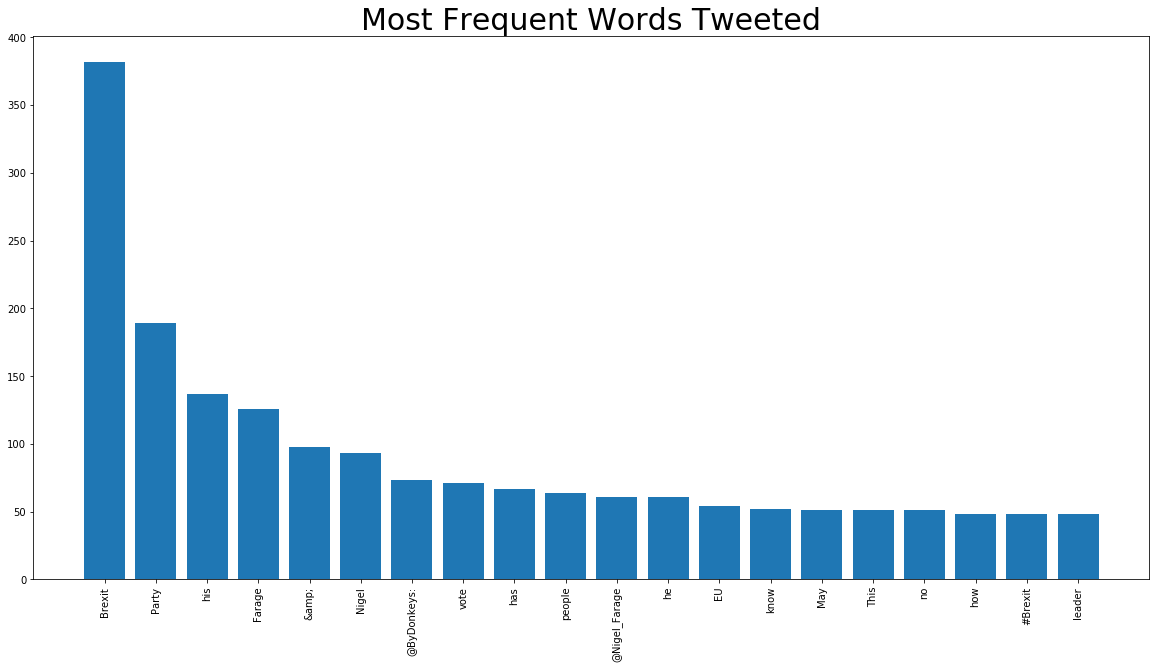

In [27]:
import matplotlib.pyplot as plt

D = top_tweets

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.title("Most Frequent Words Tweeted", fontsize=30)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()


# SENTIMENT ANALYSIS 

The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

# Now the Theory
Thanks to Siraj Raval and freecode camp for the sample here

TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

A textblob can be created in the following way (example, and not part of the original code):

example = TextBlob("Python is a high-level, general-purpose programming language.")
And tokenization can be performed by the following methods:
words: returns the words of text

usage:

example.words
sentences: returns the sentences of text

usage:

example.sentences


In [28]:
from textblob import TextBlob

In [29]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [32]:
public_tweets = api.search('Brexit')

In [33]:
objective_tweet=0
subjective_tweet=0
negitively_subjective=0
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       subjective_tweet = subjective_tweet + 1
       print('Subjective')
    elif analysis.sentiment[0]<0:
       negitively_subjective = negitively_subjective  + 1
       print('Negatively subjective')
    else:
       objective_tweet = objective_tweet + 1
       print('objective')
    print('\n')
    
print('objective_tweets : '+str(objective_tweet))
print('subjective_tweets : '+str(subjective_tweet))
print('negitively_subjective tweets: '+str(negitively_subjective))

@TimRose27916967 @PJChapman74 @TheaDickinson No deal will happen... It's just a question of when. The rise of Farag… https://t.co/cE7hdtuk9K
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @MairiMcAllan: When future history students learn of Scotland’s journey to Indy they will learn of the poll tax, of illegal wars, of hos…
Sentiment(polarity=-0.25, subjectivity=0.3125)
Negatively subjective


Tearful Theresa May Meets the Men in Grey: The Inside Story

https://t.co/TsxWIjzPyR

A tearful Theresa May pleaded… https://t.co/S5EWc50TCh
Sentiment(polarity=-0.05, subjectivity=0.1)
Negatively subjective


RT @RhydianFitter: If remainers unite behind Plaid Cymru, Wales can beat Brexit! https://t.co/Z8dozc0XCz
Sentiment(polarity=-0.5, subjectivity=0.7)
Negatively subjective


RT @VidalQuadras: Hoy la BBC se refiere a Josu Ternera como “líder de los rebeldes vascos”. Es de suponer que cuando hable de Jack el Destr…
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @carolecadwall